# Proyecto de curso - Neurona con actividad de picos
***
## Grupo:
1. Adrián Bedón
1. Merlo José Miguel
1. Moreta Andrés
1. Ocaña Dennis
1. Ramos Xavier

---
## Qué es el modelo estocástico?
Un modelo estocástico es un sistema dinámico y cambiante a lo largo del tiempo. Este sistema esta compuesto por variables aleatorias y se analiza en términos de probabilidad.

Cada una de las variables en el proceso puede tener su propia función de distribución y pueden o no estar correlacionadas entre sí.

Un ejemplo de esto es el índice de la bolsa de valores.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/TelekomAustriaAktie.png/200px-TelekomAustriaAktie.png" width="300"/>

Cada variable o conjunto de variables sometidas a influencias o efectos aleatorios constituye un proceso estocástico. Un proceso estocástico X(t) puede entenderse como una familia uniparamétrica de variables aleatorias indexadas mediante el tiempo t.

---
## Qué es una neurona con actividad de picos?
Al igual que una neurona real, una vez que la actividad alcanza cierto umbral existe una posibilidad en la que la actividad de la neurona se dispara. Este incremento repentino en la actividad produce un pico, lo cual le da el nombre a este tipo de neuronas.

<img src="https://udla.brightspace.com/content/enforced/154307-202320-251-ISWZ2402-3106_3107/PastedImage_bb65efa2650f46a88c5043d78bf10ad8_image.png?_&d2lSessionVal=nJEnEiB4IIXW3rMeJmSunc5mm" width="500"/>
<img src="https://bioserver.net/wp-content/uploads/2021/03/Example-of-a-neuronal-membrane-votage-changes.png" width="500"/>

---
## Implementación del modelo para neuronas individuales
En esta sección se construirá un modelo neuronal con un umbral, oscilaciones y capacidad de generar picos. Esta espontánea evolución de la actividad de una neurona se asemejará a una "caminata" aleatoria. La actividad de la neurona es considerada una variable discreta y será en función del tiempo, siendo así:

𝑎(𝑡+1)={𝑎𝑖(𝑡)+𝐶 con probabilidad pai(t)

Donde p es la probabilidad de cambiar su estado interno en cada paso. Siendo así también que 1-p será la probabilidad de mantenerse en su estado actual. 
C es un parámetro que depende de la evolución a lo largo del tiempo, este parámetro tiene 3 estados posibles, de "escalada" (siendo que la neurona esta incrementando su actividad por debajo del umbral siendo C = 1, de "disparo" siendo que está en el umbral. Y de reset que será cuando la neurona haya disparado o haya alcanzado el umbral y deberá regresar a su punto inicial siguiento C = L / 5 con probablidad p = 1 de ocurrir.

Se adjunta una representación esquemática.

<img src="https://udla.brightspace.com/content/enforced/154307-202320-251-ISWZ2402-3106_3107/PastedImage_207c2a7ba74a4a5fabb5dbbb2e06b797_image.png?_&d2lSessionVal=nJEnEiB4IIXW3rMeJmSunc5mm
" width="800"/>

In [4]:
## imports necesarios para la implementación
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

In [2]:
def stochastic_neuron_model(num_steps, p, pf, L):
    a = 0  # Actividad Inicial
    activity = [a]  # Actividad a lo largo del tiempo
    state = 0
    count = 0
    count2 = 0
    
    for _ in range(num_steps):
        if a < L and state == 0:  # Estado subumbral
            if np.random.random() < p:  # Incremento de la actividad en 1
                a += 1
                state = 0
            else:
                a = a
        else:  # Estado umbral
            if np.random.random() < pf and state == 0:  # Generación del disparo
                a += 3 * L
                state = 1
                count += 1
                count2 += 1
            else:  # Descenso si no se genera el disparo
                if state == 1:
                    a -= L
                    state = 1
                    count += 1
                    if a <= 0:
                        state = 0
                else:  # Descenso después de que el disparo se ha generado
                    a -= (L / 5)
                    state = 2
                    if a <= 0:
                        state = 0
        activity.append(a)
    return activity

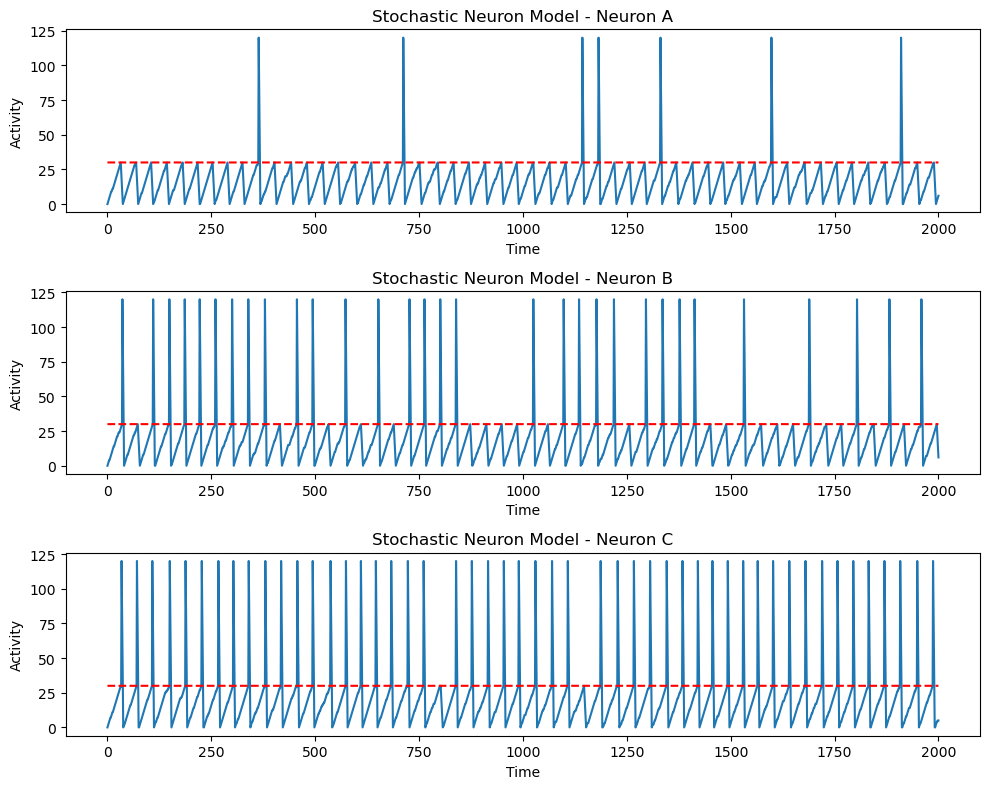

In [3]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Panel A - Case 1
num_steps = 2000
p = 0.9
pf = 0.1
L = 30
activity = stochastic_neuron_model(num_steps, p, pf, L)
time = list(range(num_steps + 1))
axs[0].plot(time, activity)
axs[0].plot(time, [L] * len(time), 'r--', label='L')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Activity')
axs[0].set_title('Modelo estocástico de Neuronas - Neurona A')

# Panel A - Case 2
num_steps = 2000
p = 0.9
pf = 0.5
L = 30
activity = stochastic_neuron_model(num_steps, p, pf, L)
time = list(range(num_steps + 1))
axs[1].plot(time, activity)
axs[1].plot(time, [L] * len(time), 'r--', label='L')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Activity')
axs[1].set_title('Modelo estocástico de Neuronas - Neurona B')

# Panel A - Case 3
num_steps = 2000
p = 0.9
pf = 0.9
L = 30
activity = stochastic_neuron_model(num_steps, p, pf, L)
time = list(range(num_steps + 1))
axs[2].plot(time, activity)
axs[2].plot(time, [L] * len(time), 'r--', label='L')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Activity')
axs[2].set_title('Modelo estocástico de Neuronas - Neurona C')

plt.tight_layout()

---
## Construcción de un modelo conectado de 3 neuronas
Las siguientes neuronas simularán una interconexión como fueran un acomplamiento eléctrico y su conductividad será dada por: <div>
𝑎𝑖(𝑡)=𝑎𝑖(𝑡)+𝑔∑𝑗=𝑛𝑒𝑖𝑔ℎ𝑏𝑜𝑟𝑠[𝑎𝑗(𝑡−1)−𝑎𝑖(𝑡−1)]<div>
donde g es la conductividad del acoplamiento y 𝑎𝑗(𝑡) es la actividad


In [4]:
# Definición de la función para el cálculo de la actividad de la red neuronal de 3 neuronas
def stochastic_neuron_model_network(p, pf, L, g, num_steps, n_neurons):
    G = nx.complete_graph(n_neurons)
    a = np.zeros((n_neurons, num_steps))
    states = np.zeros(n_neurons, dtype = int)
    for _ in range(1, num_steps):
        for node in range(n_neurons):
            if a[node, _-1] < L and states[node] == 0:  # Estado subumbral
                if np.random.random() < p:  # Se incrementa la actividad en uno
                    a[node, _] = a[node, _-1] + 1
                    states[node] = 0
                else:
                    a[node, _] = a[node, _-1]
            else:  # Estado de umbral
                if np.random.random() < pf and states[node] == 0:  # Generación de disparo
                    a[node, _] = a[node, _-1] + (3 * L)
                    states[node] = 1
                else:
                    if states[node] == 1: # Descenso si se produce el disparo
                        a[node, _] = a[node, _-1] - L
                        if a[node, _] <= 0:
                            states[node] = 0
                    else:  # Descenso si no se produce el disparo
                        a[node, _] = a[node, _-1] - (L / 5)
                        states[node] = 2
                        if a[node, _] <= 0:
                            states[node] = 0
        for node in range(n_neurons):
            neighbors = list(G.neighbors(node)) #Obtención de los nodos vecinos
            c = g * np.sum([a[n, _ - 1] - a[node, _ - 1] for n in neighbors]) # Cálculo de acoplamiento elétrico
            a[node, _] = max(0, a[node, _] + c)
    return a

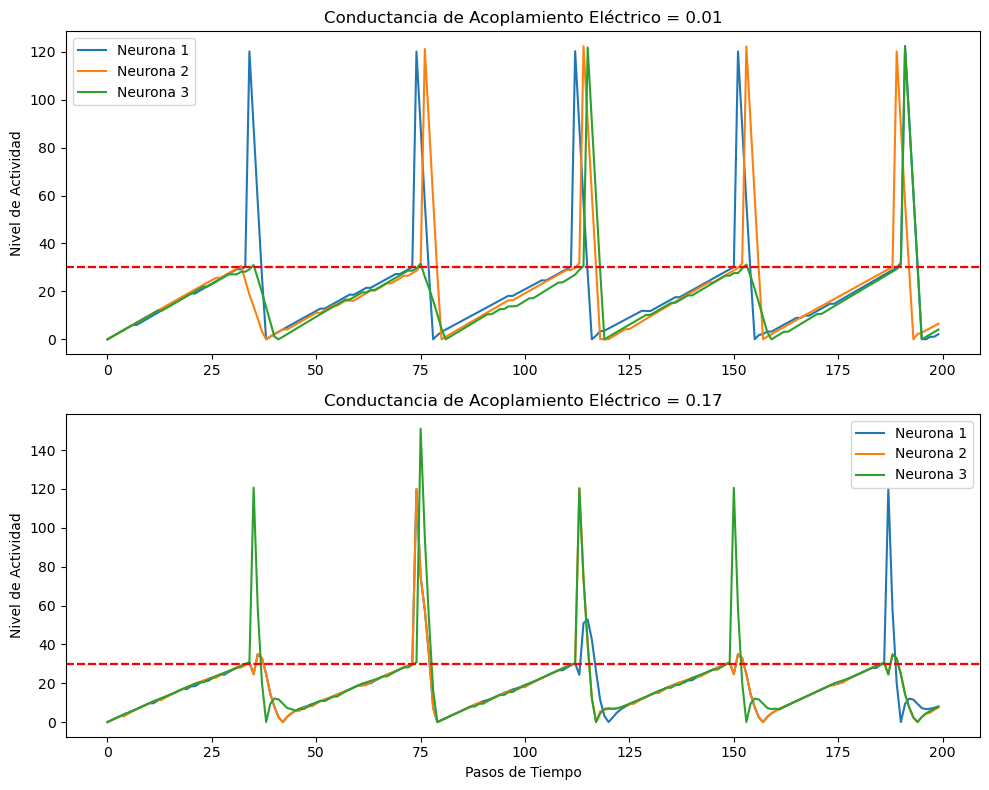

In [5]:
# Crear un grafo completo con 3 nodos (neuronas)
G = nx.complete_graph(3)

# Definir los parámetros del modelo de la neurona estocástica
p = 0.9  # Probabilidad de transición del estado interno
pf = 0.7  # Probabilidad de disparo (firing)
L = 30  # Umbral de activación
num_steps = 200  # Número de pasos de tiempo
g = [0.01, 0.17]  # Valores de conductancia de acoplamiento eléctrico

# Crear una figura con subplots para diferentes valores de conductancia
fig, axes = plt.subplots(len(g), 1, figsize=(10, 8))

# Iterar a través de los diferentes valores de conductancia
for i, _ in enumerate(g):
    # Obtener la actividad de las neuronas estocásticas utilizando el modelo definido
    a = stochastic_neuron_model_network(p, pf, L, _, num_steps, len(G))

    # Graficar la actividad de cada neurona a través del tiempo
    for element in range(len(G)):
        axes[i].plot(a[element, :], label=f'Neurona {element+1}')
        axes[i].axhline(y=L, color='r', linestyle='--')
        axes[i].set_title(f'Conductancia de Acoplamiento Eléctrico = {_}', fontsize=12)
        axes[i].set_ylabel('Nivel de Actividad', fontsize=10)
        axes[i].legend()
    
    # Etiquetas y título para el último subplot (el eje x)
    axes[-1].set_xlabel('Pasos de Tiempo', fontsize=10)

# Ajustar el espaciado entre subplots para que los títulos no se superpongan
plt.tight_layout()

In [6]:
def stochastic_neuron_model_network(p, pf, L, g, num_steps, n_neurons):
    G = nx.grid_2d_graph(n_neurons, n_neurons)
    a = np.zeros((n_neurons, n_neurons, num_steps))
    states = np.zeros((n_neurons, n_neurons), dtype=int)

    for _ in range(1, num_steps):
        for x in range(n_neurons):
            for y in range(n_neurons):
                node = (x, y)
                if a[x, y, _ - 1] < L and states[x, y] == 0:  # Subthreshold regime
                    if np.random.random() < p:  # Transition to higher activity state
                        a[x, y, _] = a[x, y, _ - 1] + 1
                        states[x, y] = 0
                    else:
                        a[x, y, _] = a[x, y, _ - 1]
                else:  # Threshold reached
                    if np.random.random() < pf and states[x, y] == 0:  # Spike generation
                        a[x, y, _] = a[x, y, _ - 1] + (3 * L)
                        states[x, y] = 1
                    else:
                        if states[x, y] == 1:# No spike, decrease activity to initial state
                            a[x, y, _] = a[x, y, _ - 1] - L
                            states[x, y] = 1
                            if a[x, y, _] <= 0:
                                states[x, y] = 0
                        else:  # Activity decreasing after
                            a[x, y, _] = a[x, y, _ - 1] - (L / 5)
                            states[x, y] = 2
                            if a[x, y, _] <= 0:
                                states[x, y] = 0

        for x in range(n_neurons):
            for y in range(n_neurons):
                node = (x, y)
                neighbors = list(G.neighbors(node))
                c = g * np.sum([a[n[0], n[1], _ - 1] - a[x, y, _ - 1] for n in neighbors])
                a[x, y, _] = a[x, y, _] + c

    return a

Text(0.5, 1.0, 'Grid Network of 30x30 Neurons')

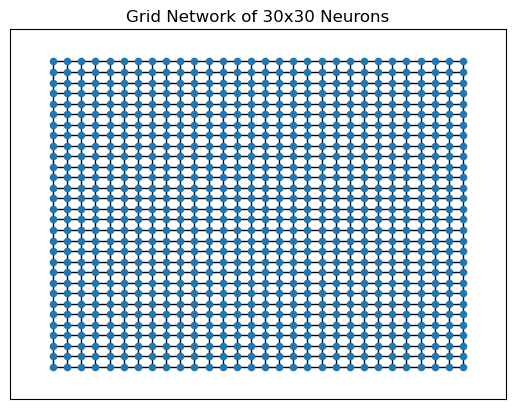

In [7]:
# Create a 30x30 grid network
num_rows = 30
num_columns = 30
G = nx.grid_2d_graph(30, 30)

# Plot the grid network
pos = {(x,y): (x, y) for x,y in G.nodes()}
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=20)
plt.title("Grid Network of 30x30 Neurons")

MovieWriter Pillow unavailable; using Pillow instead.


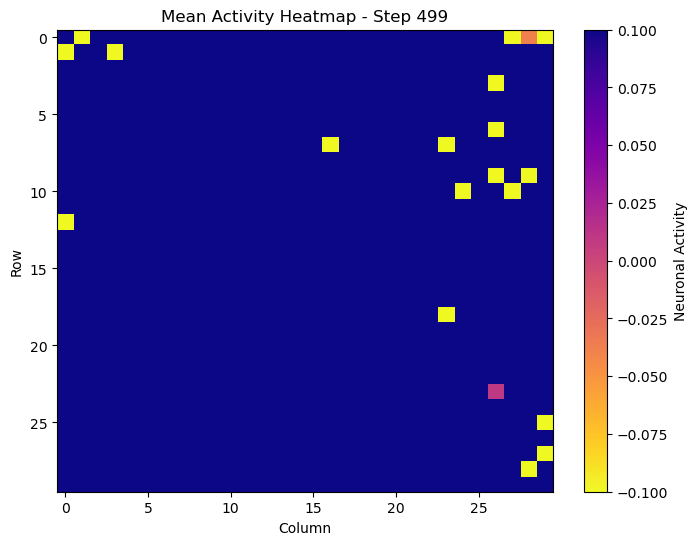

In [8]:
# Parámetros de la red
num_rows = 30
num_columns = 30

# Parámetros de la red neuronal estocástica
p = 0.9  # Probabilidad de incrementar la actividad
pf = 0.7  # Probabilidad de generar un pico (spike)
L = 30  # Valor de decremento de actividad
g = 0.17  # Fuerza de acoplamiento
num_steps = 500  # Número de pasos de la simulación

# Reorganizar la actividad en una matriz 2D para visualización
activity = stochastic_neuron_model_network(p, pf, L, g, num_steps, num_rows)
activity_grid = activity.T.reshape((num_steps, num_rows, num_columns))

# Crear el heatmap para el primer frame
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(activity_grid[0], cmap='plasma_r', aspect='auto')
plt.colorbar(im, ax=ax, label='Neuronal Activity')
ax.set_title('Mean Activity Heatmap - Step 0')
ax.set_xlabel('Column')
ax.set_ylabel('Row')

# Función de actualización de la animación
def update(frame):
    current_activity = activity_grid[frame]
    im.set_array(current_activity)
    ax.set_title(f'Mean Activity Heatmap - Step {frame}')
    return [im]

# Generar la animación
num_frames = num_steps
anim = FuncAnimation(fig, update, frames=num_frames, interval=50, blit=True)

# Guardar la animación como un archivo GIF
anim.save('neuronal_activity_heatmap.gif', writer='Pillow', fps=10)

# Mostrar la animación (esto solo es efectivo en Jupyter Notebook u otros entornos compatibles con animaciones en tiempo real)
plt.show()

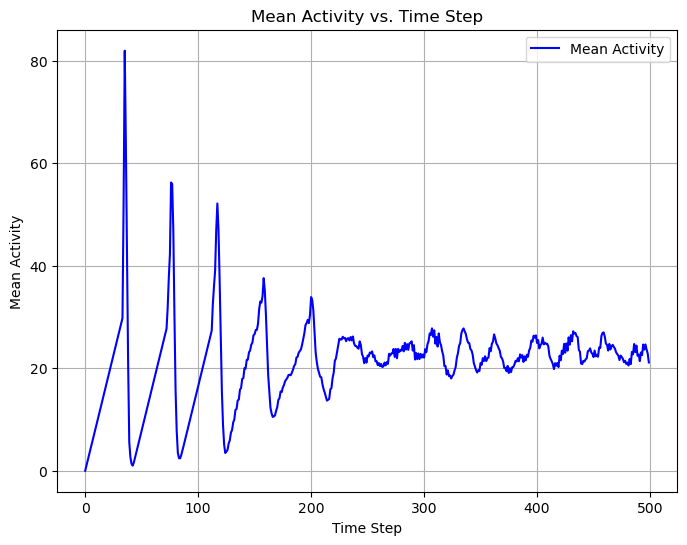

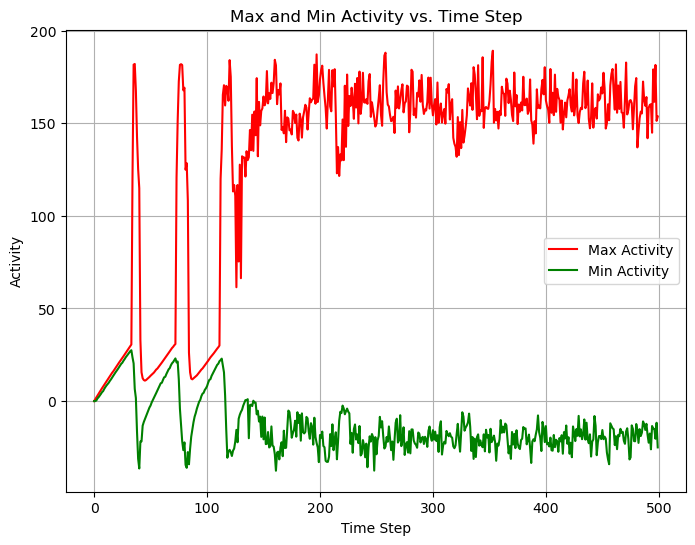

Average Difference Between Peaks: 10.662302898808619


In [19]:
# Lista para almacenar los valores promedio de actividad en cada paso de tiempo
mean_activity_list = []

# Lista para almacenar los valores máximos y mínimos de actividad en cada paso de tiempo
max_activity_list = []
min_activity_list = []

# Calcular la actividad promedio y encontrar los picos en cada paso de tiempo
for step in range(num_steps):
    current_activity = activity_grid[step]
    mean_activity = np.mean(current_activity)
    mean_activity_list.append(mean_activity)
    
    # Encontrar los índices de los valores máximos y mínimos de actividad en el paso de tiempo actual
    max_index = np.unravel_index(np.argmax(current_activity), current_activity.shape)
    min_index = np.unravel_index(np.argmin(current_activity), current_activity.shape)
    
    # Guardar los valores máximos y mínimos de actividad en cada paso de tiempo
    max_activity_list.append(current_activity[max_index])
    min_activity_list.append(current_activity[min_index])

# Calcular la diferencia promedio entre picos
average_peak_difference = np.mean(np.abs(np.diff(max_activity_list)))

# Graficar la actividad promedio en función del tiempo
plt.figure(figsize=(8, 6))
plt.plot(range(num_steps), mean_activity_list, label='Mean Activity', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Mean Activity')
plt.title('Mean Activity vs. Time Step')
plt.legend()
plt.grid(True)
plt.show()

# Graficar los valores máximos y mínimos de actividad en función del tiempo
plt.figure(figsize=(8, 6))
plt.plot(range(num_steps), max_activity_list, label='Max Activity', color='red')
plt.plot(range(num_steps), min_activity_list, label='Min Activity', color='green')
plt.xlabel('Time Step')
plt.ylabel('Activity')
plt.title('Max and Min Activity vs. Time Step')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir el resultado de la diferencia promedio entre picos
print(f"Average Difference Between Peaks: {average_peak_difference}")